In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from datetime import datetime
from ema_workbench import load_results

In [2]:
experiment_datetime = "20230614T1806" ## change these 2 lines based on filename you want to read in
experiment_type = "generate_all" ## "fixed_policies" or "generate_all"
if experiment_type == "fixed_policies":
    results = load_results('./output/' + experiment_datetime + '_results__policies_fixed__scenarios_generated')
elif experiment_type == "generate_all":
    results = load_results('./output/' + experiment_datetime + '_results__all_generated')
else:
    results = load_results('./output/FILENOTFOUND')

In [3]:
experiments, outcomes = results
experiments_df = pd.DataFrame(experiments)
outcomes_df = pd.DataFrame(outcomes)

In [4]:
experiments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A.0_ID flood wave shape  50000 non-null  int64  
 1   A.1_Bmax                 50000 non-null  float64
 2   A.1_Brate                50000 non-null  float64
 3   A.1_pfail                50000 non-null  float64
 4   A.2_Bmax                 50000 non-null  float64
 5   A.2_Brate                50000 non-null  float64
 6   A.2_pfail                50000 non-null  float64
 7   A.3_Bmax                 50000 non-null  float64
 8   A.3_Brate                50000 non-null  float64
 9   A.3_pfail                50000 non-null  float64
 10  A.4_Bmax                 50000 non-null  float64
 11  A.4_Brate                50000 non-null  float64
 12  A.4_pfail                50000 non-null  float64
 13  A.5_Bmax                 50000 non-null  float64
 14  A.5_Brate             

## Most relevant uncertainties
Out of the 52 uncertain it was found with feature scoring that A4 Pfail is highly corralated with A4 expected number of deathts and A4 expected number of damages. For the total expected number of deaths and damages A1 P_fail and A3 pfail are highly correlated and A2 pfail slightly. 

In [5]:
experiments_df2 = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail', 'A.4_DikeIncrease 0', "A.4_DikeIncrease 1", "A.4_DikeIncrease 2"]] 
experiments_df2

,A.4_Bmax,A.4_Brate,A.4_pfail,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2
0,311.801482,1.5,0.879433,8,0,3
1,180.199965,1.0,0.908913,8,0,3
2,305.671229,1.0,0.188154,8,0,3
3,51.210699,1.0,0.231414,8,0,3
4,145.781155,1.5,0.562831,8,0,3
...,...,...,...,...,...,...
49995,280.131030,1.5,0.946822,3,5,5
49996,219.261510,1.5,0.707038,3,5,5
49997,53.799377,1.5,0.340336,3,5,5
49998,109.902415,1.5,0.749235,3,5,5


In [6]:
outcomes_df

,A.1 Expected Annual Damage,A.1 Expected Number of Deaths,A.2 Expected Annual Damage,A.2 Expected Number of Deaths,A.3 Expected Annual Damage,A.3 Expected Number of Deaths,A.4 Expected Annual Damage,A.4 Expected Number of Deaths,A.5 Expected Annual Damage,A.5 Expected Number of Deaths,Total Infrastructure Costs,Total Expected Annual Damage,Total Expected Number of Deaths
0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.596989e+09,0.000000e+00,0.000000
1,2.405972e+07,0.005072,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.596989e+09,2.405972e+07,0.005072
2,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,3.183310e+06,0.001296,1.596989e+09,3.183310e+06,0.001296
3,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.596989e+09,0.000000e+00,0.000000
4,0.000000e+00,0.000000,167063.773642,0.000073,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.596989e+09,1.670638e+05,0.000073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.384703e+09,0.000000e+00,0.000000
49996,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.384703e+09,0.000000e+00,0.000000
49997,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,391259.996866,0.00004,0.000000e+00,0.000000,1.384703e+09,3.912600e+05,0.000040
49998,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.000000,1.384703e+09,0.000000e+00,0.000000


## Dimensional stacking (Fixed Policies)

Compares all the uncertainties/ model levers with one outcome. 


## Exploration of total deaths and damages

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


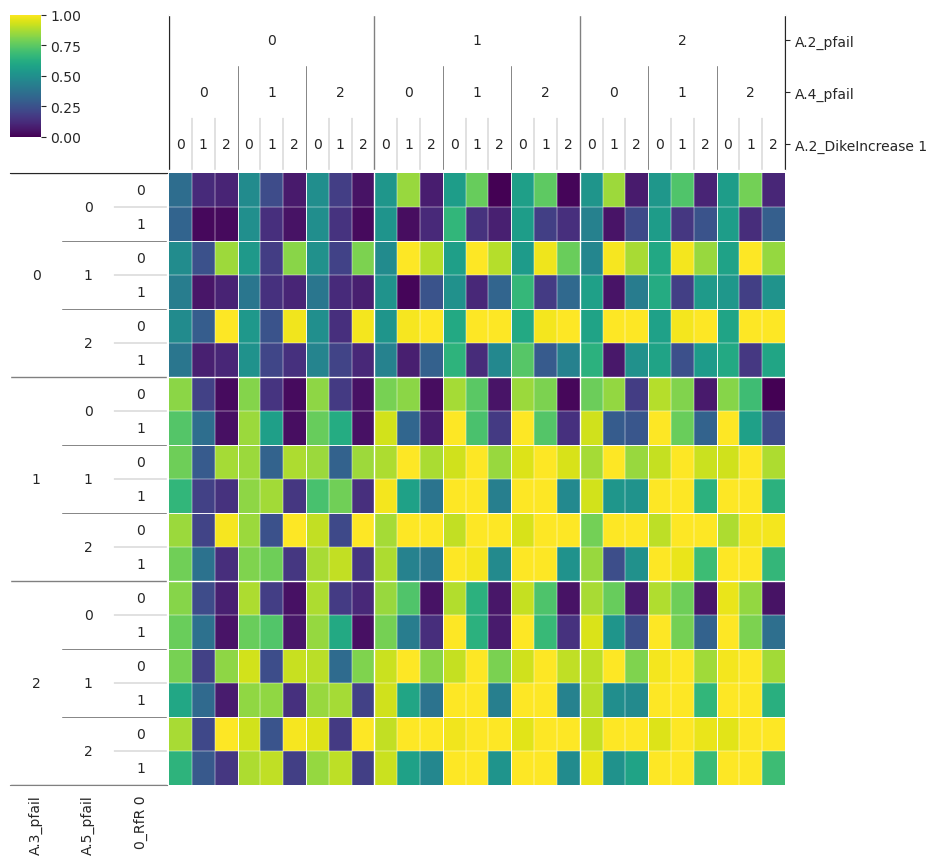

In [7]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["Total Expected Annual Damage"] < 10000000 
dimensional_stacking.create_pivot_plot(x, y,3 , nbins=3) 
plt.show()

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


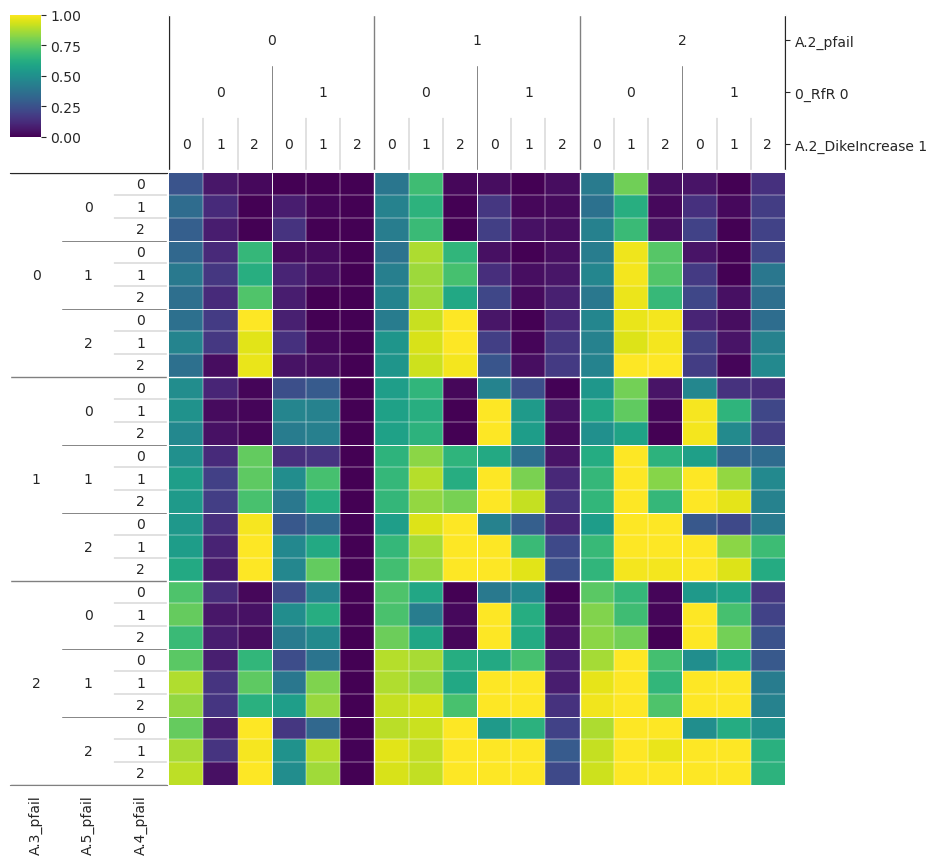

In [8]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["Total Expected Number of Deaths"] < 0.0008
dimensional_stacking.create_pivot_plot(x, y,3 , nbins=3) 
plt.show()

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


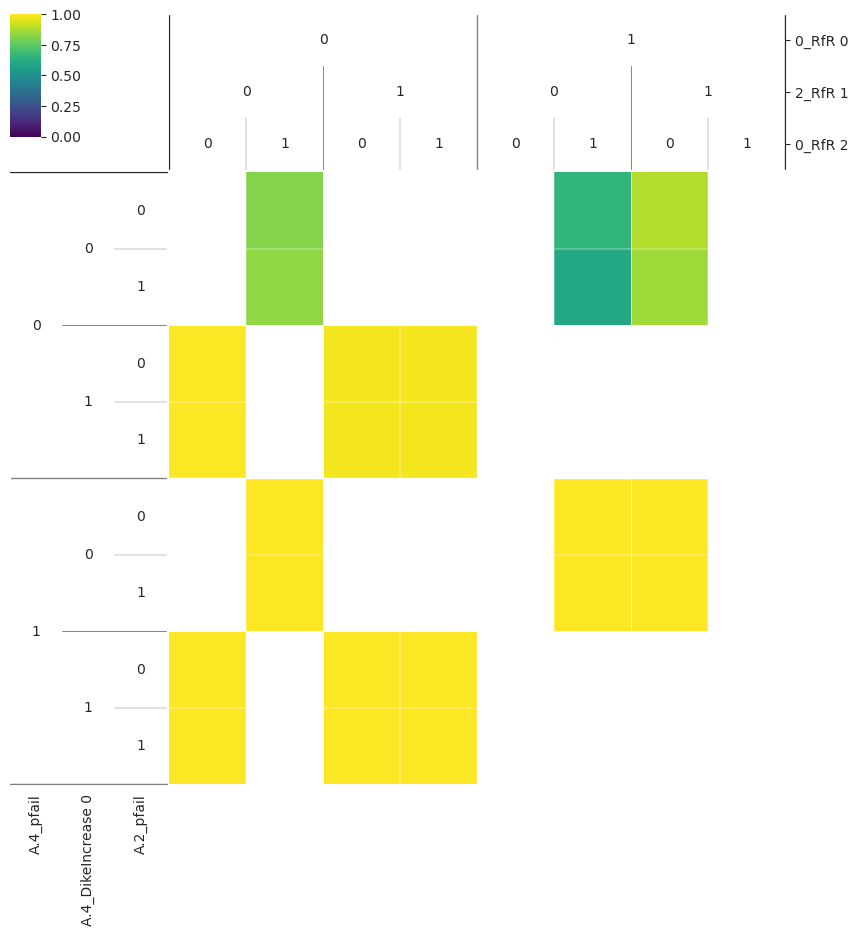

In [9]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.0003
dimensional_stacking.create_pivot_plot(x, y,3 , nbins=2) 
plt.show()

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


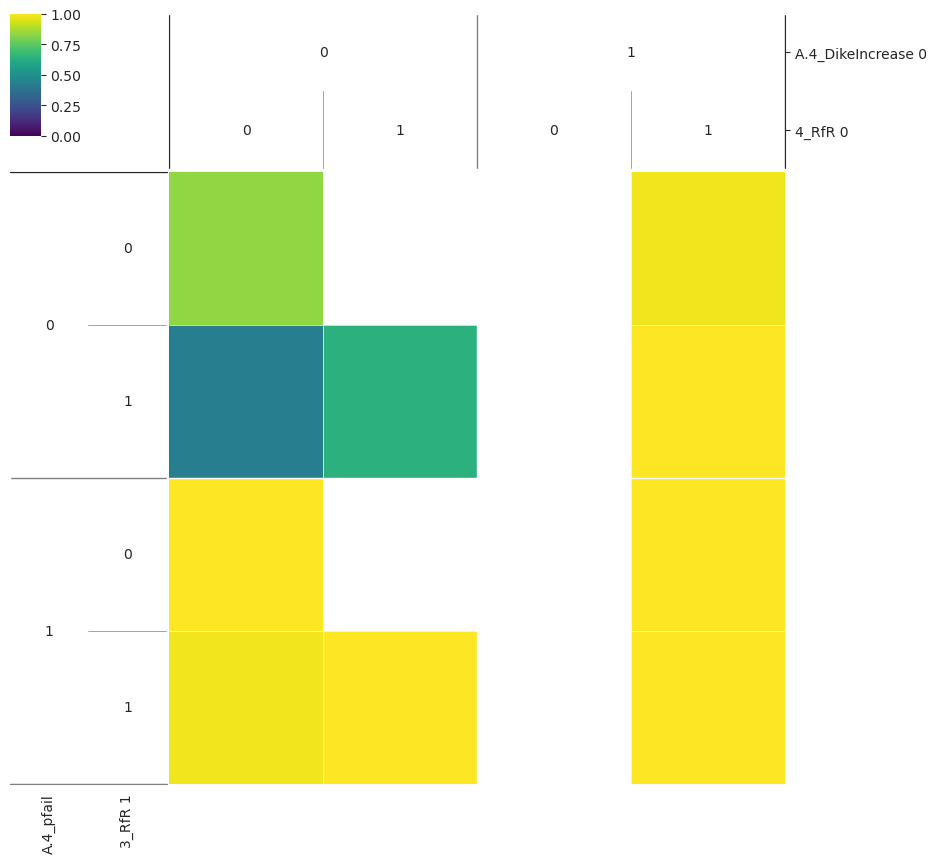

In [10]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["A.4 Expected Annual Damage"] < 1000000
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=2) 
plt.show()

## Dimensional stacking total deaths and damages based on selected 


In [11]:
experiments_df3 = experiments_df.loc[:, [ "A.2_pfail", "A.3_pfail","A.1_pfail","A.5_pfail"]] 

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


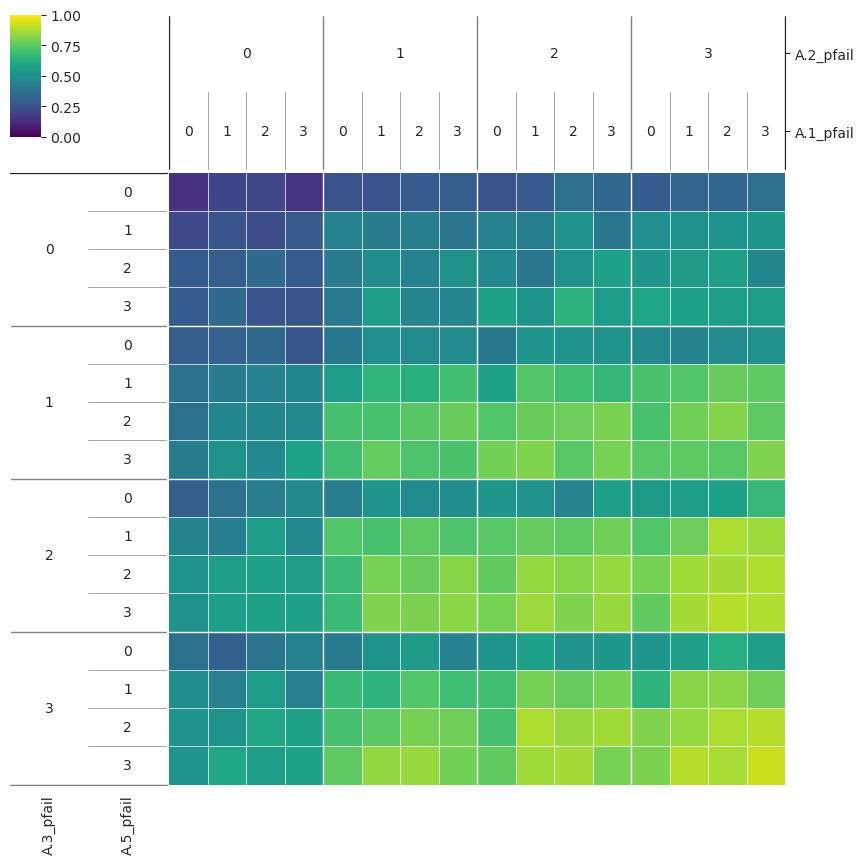

In [12]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df3
y = outcomes_df["Total Expected Annual Damage"] < 10000000 
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()

C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


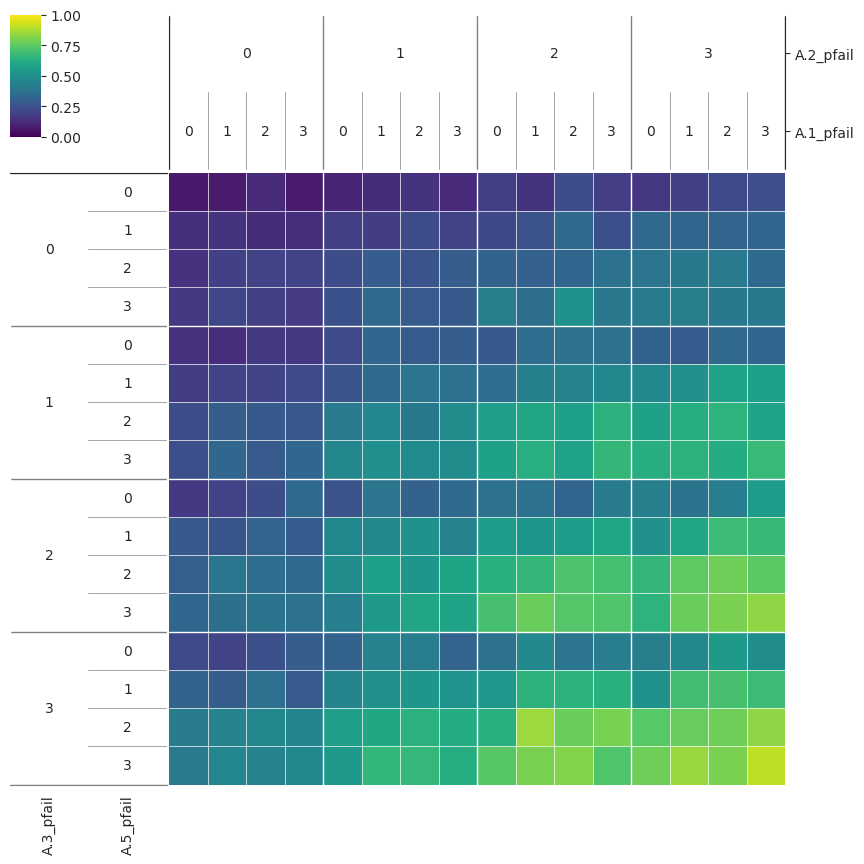

In [13]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df3
y = outcomes_df["Total Expected Number of Deaths"] < 0.0007
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()

## Dimensional stacking total deaths and damages dike ring 4 based on selected 


In [14]:
experiments_df3 = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail',"A.4_DikeIncrease 0"]] 
experiments_df3

,A.4_Bmax,A.4_Brate,A.4_pfail,A.4_DikeIncrease 0
0,311.801482,1.5,0.879433,8
1,180.199965,1.0,0.908913,8
2,305.671229,1.0,0.188154,8
3,51.210699,1.0,0.231414,8
4,145.781155,1.5,0.562831,8
...,...,...,...,...
49995,280.131030,1.5,0.946822,3
49996,219.261510,1.5,0.707038,3
49997,53.799377,1.5,0.340336,3
49998,109.902415,1.5,0.749235,3


C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


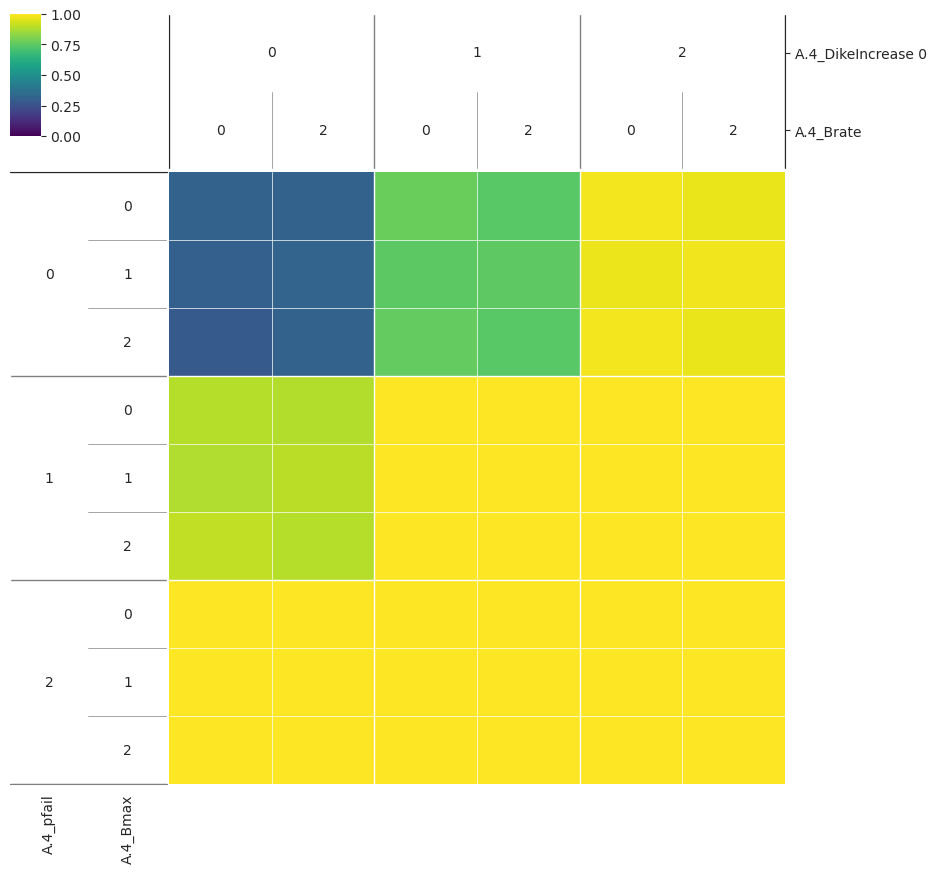

In [19]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df3
y = outcomes_df["A.4 Expected Annual Damage"] < 1000000 
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=3) 
plt.show()

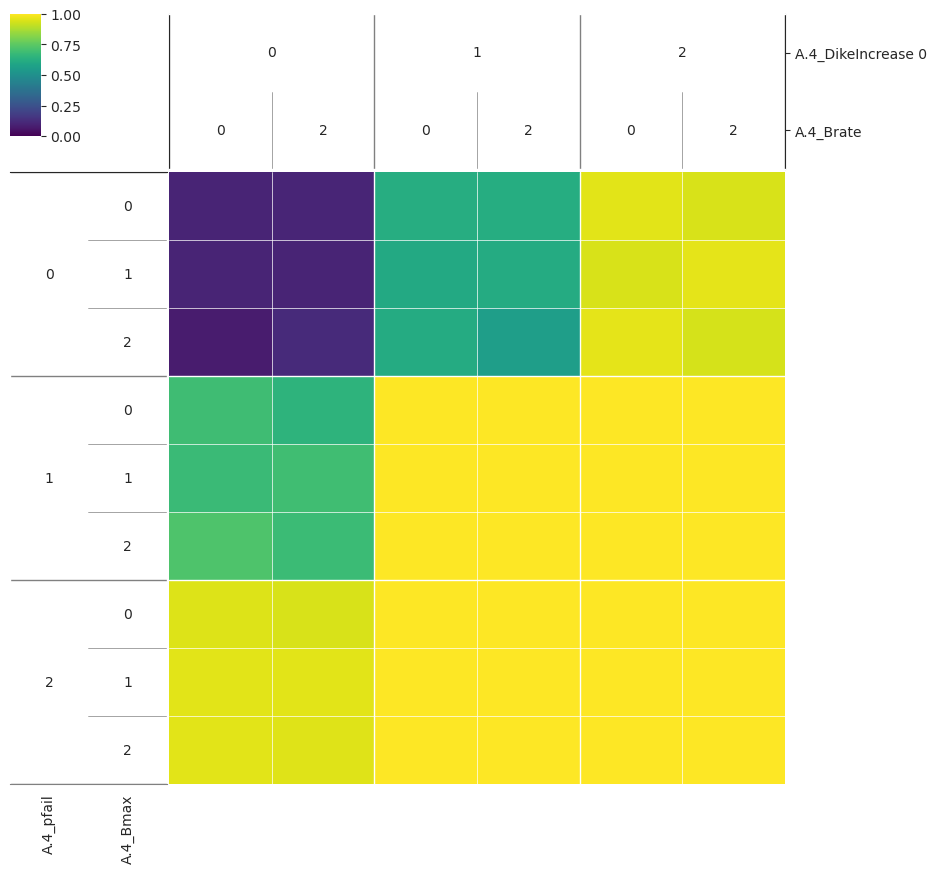

In [16]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df3
y = outcomes["A.4 Expected Annual Damage"] < 0.002
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=3)
plt.show()

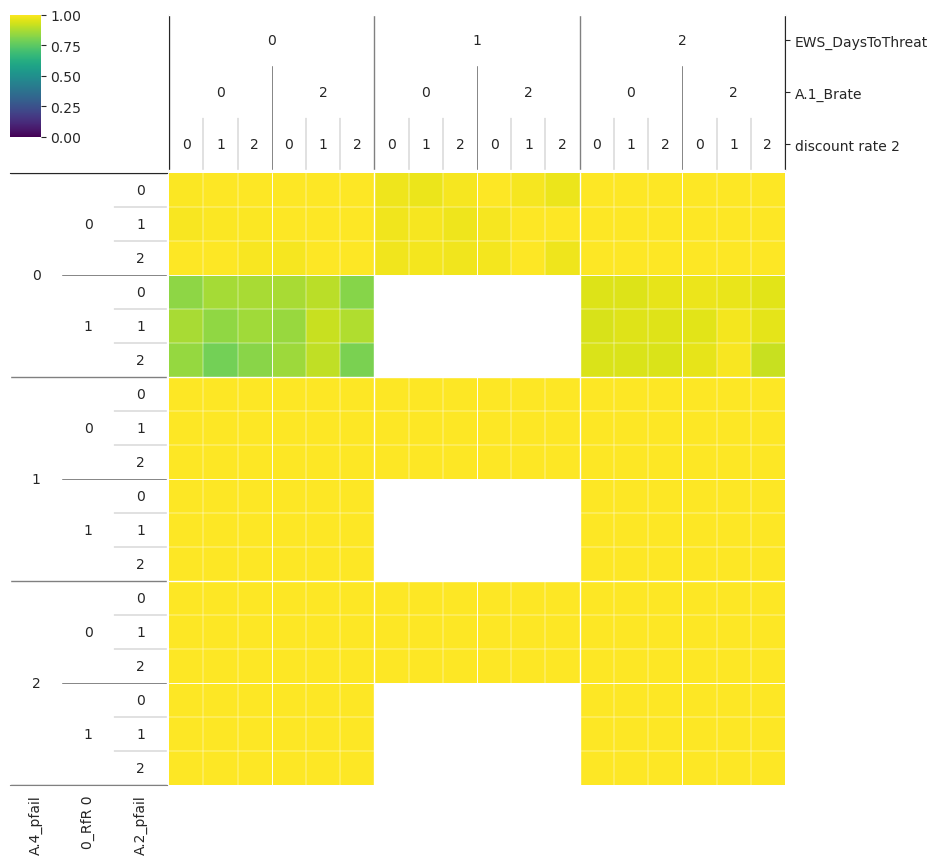

In [17]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.4 Expected Number of Deaths"] < 0.002
dimensional_stacking.create_pivot_plot(x, y,3 , nbins=3)
plt.show()